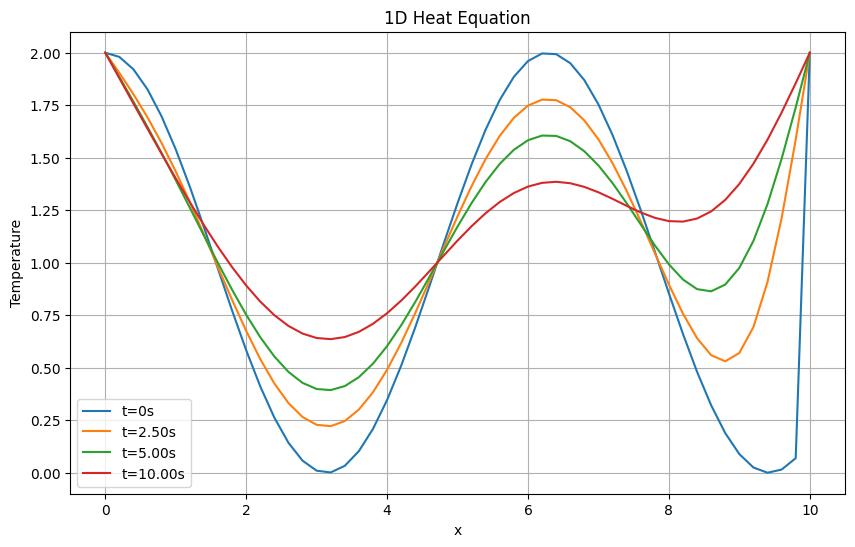

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry symulacji
L = 10.0  # długość pręta
T = 10.0   # czas symulacji
Nx = 50   # liczba punktów przestrzennych
Nt = 1000 # liczba punktów czasowych
D = 0.1  # współczynnik dyfuzji cieplnej

dx = L / Nx
dt = T / Nt

# Sprawdzenie stabilności (CFL condition)
r = D * dt / dx**2
if r > 0.5:
    raise ValueError("Warunek stabilności jest naruszony: D * dt / dx^2 <= 0.5")

# Warunki początkowe i brzegowe
def f(x):
    return np.cos(x)+1  # początkowa dystrybucja temperatury

def g1(t):
    return 2  # temperatura na lewym brzegu pręta

def g2(t):
    return 2  # temperatura na prawym brzegu pręta

# Tworzenie siatki i ustawienie warunków początkowych
x = np.linspace(0, L, Nx+1)
u = np.zeros((Nx+1, Nt+1))
u[:, 0] = f(x)

# Warunki brzegowe w czasie
u[0, :] = g1(np.linspace(0, T, Nt+1))
u[-1, :] = g2(np.linspace(0, T, Nt+1))

# Symulacja
for j in range(0, Nt):
    u[1:-1, j+1] = r * u[0:-2, j] + (1 - 2*r) * u[1:-1, j] + r * u[2:, j]

# Wykres
plt.figure(figsize=(10, 6))
plt.plot(x, u[:, 0], label='t=0s')
plt.plot(x, u[:, int(Nt/4)], label=f't={T/4:.2f}s')
plt.plot(x, u[:, int(Nt/2)], label=f't={T/2:.2f}s')
plt.plot(x, u[:, -1], label=f't={T:.2f}s')
plt.xlabel('x')
plt.ylabel('Temperature')
plt.title('1D Heat Equation')
plt.legend()
plt.grid()
plt.show()